import requests
import pandas as pd
import re
import numpy as np
import os

import math
import statistics

from bs4 import BeautifulSoup

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline


headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0'}

# Import data

In [3]:
df = pd.read_csv('nyc_therapists_updated_cleaned.csv')

In [ ]:
df.head(2)

In [ ]:
df.dtypes

In [4]:
df.shape

(6131, 85)

# Analyse the data and plot some charts

# Therapists' years in practice

In [ ]:
df.yrs_in_practice_range.value_counts(dropna=False)

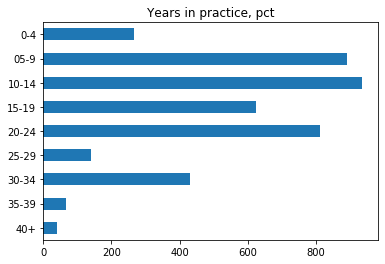

In [145]:
df.yrs_in_practice_range.value_counts().drop('None').sort_index(ascending=False).plot(kind='barh', title='Years in practice, pct')

plt.savefig("farview-yrs-in-practice.pdf")

### >> Most therapists who put 'none' as their years in practice are relatively young

In [ ]:
df.grad_yr.describe()

In [151]:
df['grad_yr_bin'] = pd.cut(df.grad_yr, range(1957, 2020, 5))
df.grad_yr_bin.value_counts(sort=False)

(1957, 1962]      6
(1962, 1967]     14
(1967, 1972]     61
(1972, 1977]    136
(1977, 1982]    245
(1982, 1987]    268
(1987, 1992]    305
(1992, 1997]    483
(1997, 2002]    549
(2002, 2007]    728
(2007, 2012]    803
(2012, 2017]    534
Name: grad_yr_bin, dtype: int64

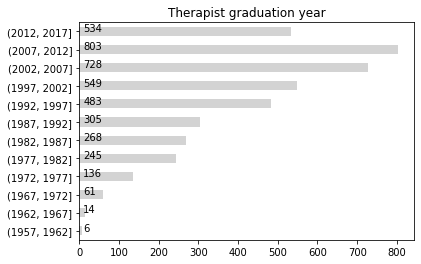

In [160]:
ax = df.grad_yr_bin.value_counts(sort=False, ascending=False).\
                            plot(kind='barh', 
                                             title='Therapist graduation year', 
                                              color='lightgrey', rot=0)

for idx, value in enumerate(df['grad_yr_bin'].value_counts(sort=False, ascending=False)):
    ax.text(10, idx, value, color='black')
    
plt.savefig("farview-grad-yr.pdf",  bbox_inches='tight')

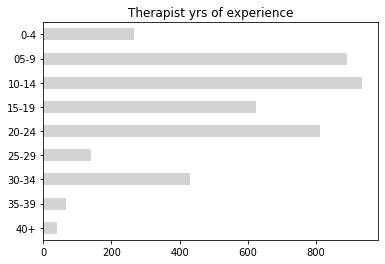

In [15]:
df.yrs_in_practice_range.value_counts(sort=False).drop('None').sort_index(ascending=False).plot(kind='barh', 
                                             title='Therapist yrs of experience', 
                                              color='lightgrey', rot=0)

plt.savefig("farview-yrs-practice.pdf")

# Plot race focus

In [ ]:
df.shape

In [16]:
race_columns = df.columns[df.columns.str.contains("racefocus_")]
df[race_columns].sum()

racefocus_afam                473
racefocus_latino_hispanic     479
racefocus_asian               275
racefocus_pacific_islander     20
racefocus_native_am            17
racefocus_other_races         519
dtype: int64

# Race focus by count

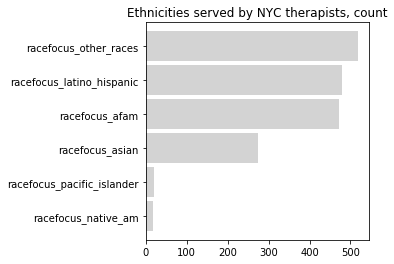

In [40]:
df[race_columns].sum().sort_values().plot(kind='barh', title="Ethnicities served by NYC therapists, count", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("farview-race-count.pdf", bbox_inches='tight')

# How many 'race focus' do therapists have?

In [23]:
df.shape

(6131, 87)

In [27]:
df['racefocus_count'] = df[race_columns].sum(axis=1)
df.racefocus_count.value_counts()

0    5053
2     705
1     373
Name: racefocus_count, dtype: int64

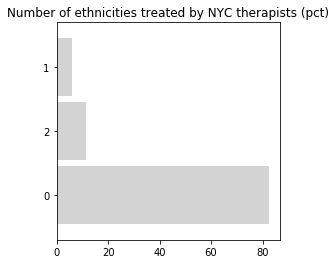

In [20]:
ax = (df.racefocus_count.value_counts() / 6119 * 100).plot(kind='barh', title="Number of ethnicities treated by NYC therapists (pct)", figsize=(4,4), width=0.9,
              color='lightgrey')

# plt.savefig("therapists-racefocus-count.pdf", bbox_inches='tight')

# Plot what age groups NYC therapists treat

In [28]:
age_columns = df.columns[df.columns.str.contains("agefocus_")]
df[age_columns].sum()

agefocus_toddlers           450
agefocus_children          1065
agefocus_preteen-tweens    1463
agefocus_teenagers         3570
agefocus_adults            5753
agefocus_elders            3053
dtype: int64

## Age focus by count

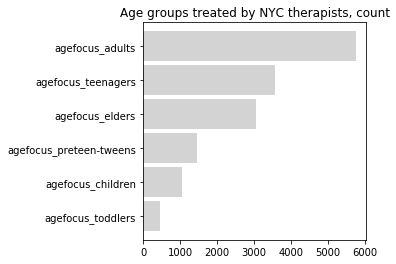

In [42]:
ax = df[age_columns].sum().sort_values().plot(kind='barh', 
              title="Age groups treated by NYC therapists, count", 
              figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("farview-age-focus.pdf", bbox_inches='tight')

# Chart what issues NYC therapists treat

In [33]:
issue_columns = df.columns[df.columns.str.contains("issues_")]
df[issue_columns].sum()

issues_family           3299
issues_anxiety          2345
issues_alcohol          1184
issues_drug              885
issues_career           1660
issues_relationship     4379
issues_stress           2403
issues_trauma           2913
issues_divorce          3065
issues_sexabuse         1647
issues_domesticabuse     892
dtype: int64

## Age focus by count

In [161]:
df[issue_columns].sum().sort_values()

issues_drug              885
issues_domesticabuse     892
issues_alcohol          1184
issues_sexabuse         1647
issues_career           1660
issues_anxiety          2345
issues_stress           2403
issues_trauma           2913
issues_divorce          3065
issues_family           3299
issues_relationship     4379
dtype: int64

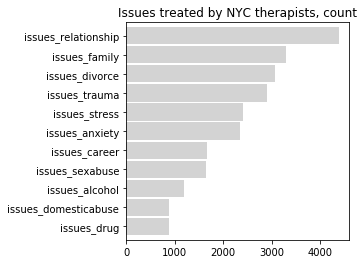

In [43]:
ax = df[issue_columns].sum().sort_values().plot(kind='barh', 
            title="Issues treated by NYC therapists, count", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("farview-issues.pdf", bbox_inches='tight')

# Chart what specialities NYC therapists have

In [37]:
sp_columns = df.columns[df.columns.str.contains("specialities_")]
df[sp_columns].sum()

specialities_pregnancy         79
specialities_addiction        441
specialities_stress           187
specialities_sexabuse          57
specialities_relationship    2804
specialities_women            161
specialities_trauma            79
dtype: int64

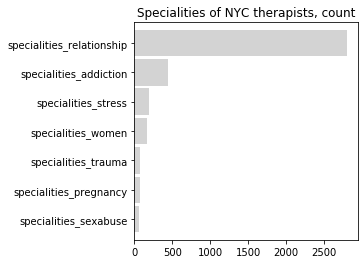

In [44]:
ax = df[sp_columns].sum().sort_values().plot(kind='barh', 
              title="Specialities of NYC therapists, count", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("farview-specialities.pdf", bbox_inches='tight')

# Chart sexual orientations treated by NYC therapists

In [45]:
sex_columns = df.columns[df.columns.str.contains("sexualityfocus")]
df[sex_columns].sum()

sexualityfocus_bisexual    2687
sexualityfocus_gay         2696
sexualityfocus_lesbian     2685
dtype: int64

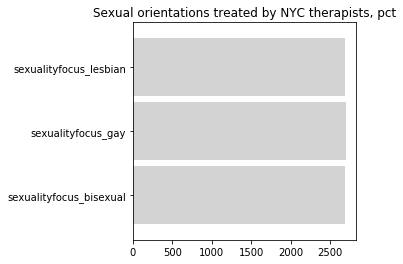

In [48]:
ax = df[sex_columns].sum().plot(kind='barh', title="Sexual orientations treated by NYC therapists, pct", figsize=(4,4), width=0.9,
              color='lightgrey')

# plt.savefig("therapists-sexuality.pdf", bbox_inches='tight')

# Chart therapy types used by NYC therapists, by pct

In [49]:
type_columns = df.columns[df.columns.str.contains("therapytype_")]
df[type_columns].sum()

therapytype_cbt               3317
therapytype_psychoanalytic    1776
therapytype_psychodynamic     4251
therapytype_marital           2154
therapytype_family            2742
therapytype_interpersonal     2571
dtype: int64

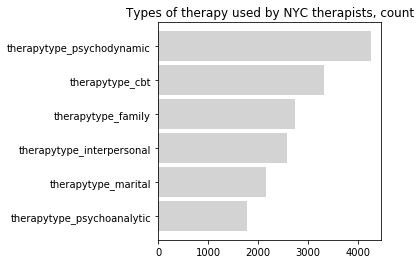

In [52]:
ax = df[type_columns].sum().sort_values().plot(kind='barh', 
              title="Types of therapy used by NYC therapists, count", 
              figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("farview-therapytype.pdf", bbox_inches='tight')

# Chart the breakdown of therapy types by years in practice

In [53]:
yrs_range = df.yrs_in_practice_range.unique()
yrs_range

array(['05-9', 'None', '0-4', '15-19', '10-14', '20-24', '30-34', '25-29',
       '35-39', '40+'], dtype=object)

In [54]:
type_columns

Index(['therapytype_cbt', 'therapytype_psychoanalytic',
       'therapytype_psychodynamic', 'therapytype_marital',
       'therapytype_family', 'therapytype_interpersonal'],
      dtype='object')

In [ ]:
df.groupby('grad_yr_bin')[type_columns].sum()

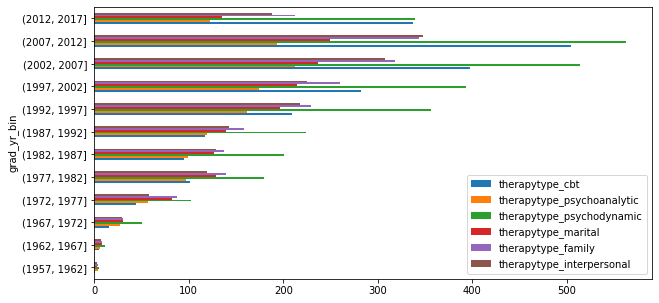

In [55]:
df.groupby('grad_yr_bin')[type_columns].sum().plot(kind='barh', figsize=(10,5))

# Problem -- some therapists list multiple therapy types, so if I set them all equal to 100, the chart becomes inaccurate and misleading

In [ ]:
counts = df.groupby('yrs_in_practice_range')[type_columns].sum()
counts.div(counts.sum(axis=1), axis=0).plot(kind='barh', stacked=True)

In [ ]:
counts = df.groupby('yrs_in_practice_range')[type_columns].sum()
counts.div(df.yrs_in_practice_range.value_counts(), axis=0).plot(kind='barh', stacked=True)

# Instead, make small multiples

* Each bar shows the percentage of therapists in each bin that practice that particular type of therapy

In [ ]:
type_columns

In [ ]:
# One example
counts = df.groupby('yrs_in_practice_range')[type_columns].sum()
combined = counts.div(counts.sum(axis=1), axis=0)
combined['therapytype_cbt'].plot(kind='barh', stacked=True)

In [163]:
counts = df.groupby('grad_yr_bin')[type_columns].sum()
combined = counts.div(counts.sum(axis=1), axis=0)
combined

,therapytype_cbt,therapytype_psychoanalytic,therapytype_psychodynamic,therapytype_marital,therapytype_family,therapytype_interpersonal
grad_yr_bin,,,,,,
"(1957, 1962]",0.050000,0.200000,0.250000,0.150000,0.200000,0.150000
"(1962, 1967]",0.108696,0.130435,0.260870,0.173913,0.173913,0.152174
"(1967, 1972]",0.086022,0.145161,0.274194,0.166667,0.166667,0.161290
"(1972, 1977]",0.102088,0.132251,0.236659,0.190255,0.204176,0.134571
"(1977, 1982]",0.131854,0.126632,0.234987,0.168407,0.182768,0.155352
"(1982, 1987]",0.120558,0.125635,0.255076,0.161168,0.173858,0.163706
"(1987, 1992]",0.129856,0.132075,0.248613,0.154273,0.176471,0.158713
"(1992, 1997]",0.152443,0.118162,0.259664,0.143691,0.167031,0.159008
"(1997, 2002]",0.182053,0.112331,0.253712,0.138799,0.167850,0.145255


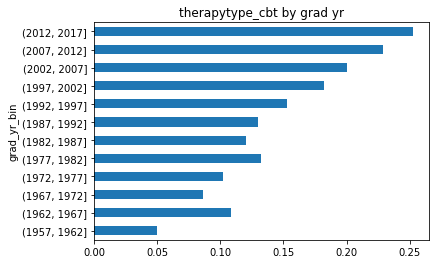

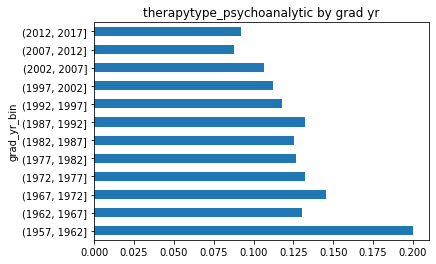

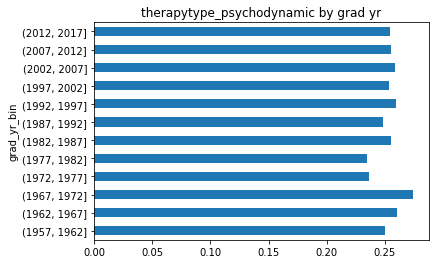

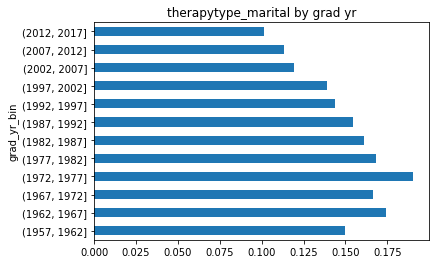

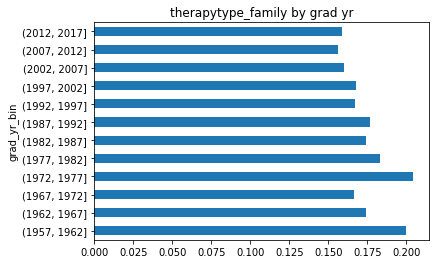

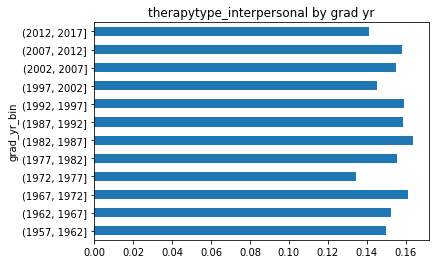

In [167]:
for therapy in type_columns:
    fig, ax = plt.subplots()
    counts = df.groupby('grad_yr_bin')[type_columns].sum()
    combined = counts.div(counts.sum(axis=1), axis=0)
    combined[therapy].plot(kind='barh', stacked=True, title=f'{therapy} by grad yr')
    plt.savefig(f"therapists-{therapy}-by-gradyr.pdf", bbox_inches='tight')

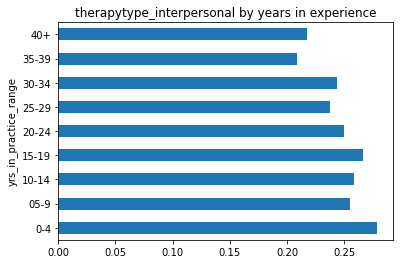

In [56]:
for therapy in type_columns:
    counts = df.groupby('yrs_in_practice_range')[type_columns].sum()
    combined = counts.div(counts.sum(axis=1), axis=0)
    combined[therapy].drop('None').plot(kind='barh', stacked=True, title=f'{therapy} by years in experience')
    plt.savefig(f"therapists-{therapy}-by-experience.pdf", bbox_inches='tight')

# How to drop None values from the chart

In [ ]:
combined['therapytype_cbt'].dropna().plot(kind='barh', stacked=True)

In [ ]:
df.groupby('grad_yr_bin')[type_columns].sum().plot(kind='barh', figsize=(10,5))

In [ ]:
df.groupby('yrs_in_practice_range')[type_columns].sum().plot(kind='barh', figsize=(10,5))

# Chart therapy cost

In [ ]:
df.cost_cleaned.value_counts()

In [ ]:
df.sort_values('cost_cleaned', ascending=False)

# Outliers??

The three most expensive therapists charge thousands of dollars per session, and I think they might have mistyped and added an extra zero or two. I am going to remove these three therapists and make a new df

* remove indices 2659, 1818, 2660

In [57]:
df2 = df.drop([2659, 1818, 2660], axis=0)

In [58]:
df2['cost_bins'] = pd.cut(df2.cost_cleaned, range(0,1001,50))

In [ ]:
df2.cost_bins.value_counts()

In [ ]:
df2.shape

In [ ]:
df2.cost_bins.value_counts(sort=False).sort_index(ascending=False).plot(kind='barh')

# Therapist cost, by pct (far view)

In [60]:
df2.shape

(6128, 88)

In [62]:
df2.cost_bins.value_counts(sort=False)

(0, 50]           6
(50, 100]       196
(100, 150]     1229
(150, 200]     1714
(200, 250]      977
(250, 300]      319
(300, 350]       84
(350, 400]       16
(400, 450]        5
(450, 500]        3
(500, 550]        0
(550, 600]        1
(600, 650]        0
(650, 700]        0
(700, 750]        1
(750, 800]        0
(800, 850]        0
(850, 900]        0
(900, 950]        0
(950, 1000]       1
Name: cost_bins, dtype: int64

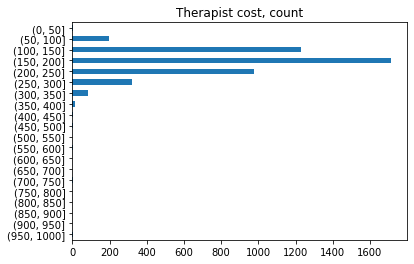

In [64]:
df2.cost_bins.value_counts(sort=False).\
    sort_index(ascending=False).plot(kind='barh', title='Therapist cost, count')

plt.savefig(f"farview-cost.pdf", bbox_inches='tight')

# Therapist cost, by type (narrow view)

In [ ]:
df2[df2['therapytype_cbt'] == 1].cost_bins.value_counts(sort=False).\
            sort_index(ascending=False).\
            plot(kind='barh', title='Cost for CBT')

In [ ]:
df2[df2['therapytype_psychoanalytic'] == 1].cost_bins.value_counts(sort=False).\
            sort_index(ascending=False).\
            plot(kind='barh', title='Cost for Psychoanalysis')

In [ ]:
df2[df2['therapytype_family'] == 1].cost_bins.value_counts(sort=False).\
            sort_index(ascending=False).\
            plot(kind='barh', title='Cost for family therapy')

In [ ]:
df2[df2['therapytype_marital'] == 1].cost_bins.value_counts(sort=False).\
            sort_index(ascending=False).\
            plot(kind='barh', title='Cost for relationship therapy')

In [ ]:
df2[df2['therapytype_interpersonal'] == 1].cost_bins.value_counts(sort=False).\
            sort_index(ascending=False).\
            plot(kind='barh', title='Cost for relationship therapy')

### >> Quick takeaway: Cost distribution seems comparable for all major therapy types

# What's the cost distribution for therapists that focus on different races?

In [ ]:
race_columns

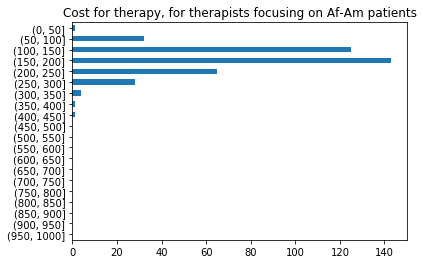

In [65]:
df2[df2['racefocus_afam'] == 1].cost_bins.value_counts(sort=False).\
            sort_index(ascending=False).\
            plot(kind='barh', title='Cost for therapy, for therapists focusing on Af-Am patients')

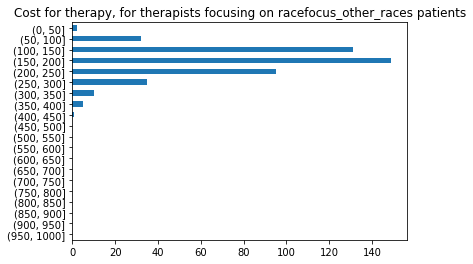

In [66]:
for race in race_columns:
    df2[df2[race] == 1].cost_bins.value_counts(sort=False).\
                sort_index(ascending=False).\
                plot(kind='barh', title=f'Cost for therapy, for therapists focusing on {race} patients')
    plt.savefig(f"therapists-cost-{race}.pdf", bbox_inches='tight')

# Is it different if we show it by pct?

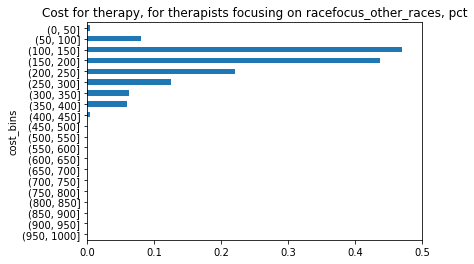

In [86]:
for race in race_columns:
    counts = df2.groupby('cost_bins')[race_columns].sum()
    combined = counts.div(counts.sum(axis=0), axis=1)
    ax = combined[race].sort_index(ascending=False).plot(kind='barh', stacked=True,\
                        title=f'Cost for therapy, for therapists focusing on {race}, pct')
    ax.set_xlim(0, 0.5)
    plt.savefig(f"therapists-cost-{race}-pct.pdf", bbox_inches='tight')

# Get therapists who have NO race focus

In [79]:
# df2[df2[race_columns].sum(axis=1) == 0]

In [ ]:
df2[df2[race_columns].sum(axis=1) == 0].cost_bins.value_counts()

In [80]:
df2[df2[race_columns].sum(axis=1) == 0].shape

(5050, 88)

In [84]:
counts = df2[df2[race_columns].sum(axis=1) == 0]
counts.head(3)

,age_focus,community_focus,cost,description,grad_yr,issues,lang,license_state,mental_health,name,...,therapytype_interpersonal,title_phd,title_LCSW,title_PsyD,title_psychologist,title_LMFT,title_LMHC,grad_yr_bin,racefocus_count,cost_bins
0,Adolescents / Teenagers (14 to 19)\nAdults,Veterans,250,"""My goal is to help you achieve a sense of con...",2013.0,Adoption\nAnxiety\nChronic Pain\nCoping Skills...,Russian,021021 New York,Mood Disorders\n ...,Maria Shifrin,...,1,1,0,0,1,0,0,"(2012.0, 2017.0]",0,"(200.0, 250.0]"
1,Adults,None,135 - 195,"""Change IS possible. Good therapeutic work can...",2013.0,Career Counseling\nCodependency\nCoping Skills...,None,085775 New York,None,Nicole Smith,...,1,0,1,0,0,0,0,"(2012.0, 2017.0]",0,"(150.0, 200.0]"
2,Preteens / Tweens (11 to 13)\nAdolescents / Te...,Aviation Professionals\nBisexual Allied\nCance...,190 - 200,"""A board certified medical support hypnosis pr...",2016.0,Child or Adolescent\nChronic Pain\nEating Diso...,"French, French, Spanich and Spanish",None,None,Sylvain Coulon Hypnosis,...,0,0,0,0,0,0,0,"(2012.0, 2017.0]",0,"(150.0, 200.0]"
3,Adolescents / Teenagers (14 to 19)\nAdults,None,70 - 140,"""You don't have to suffer alone. I'm honored t...",2016.0,Anger Management\nAnxiety\nDepression\nDivorce...,None,P03747 New York,None,Amy Benedict,...,0,0,0,0,0,0,0,"(2012.0, 2017.0]",0,"(100.0, 150.0]"
6,Adults\nElders (65+),Bisexual Allied\nCancer\nGay Allied\nHIV / AID...,100 - 200,"""I have a lot of respect for all that we go th...",2004.0,Chronic Pain\nCoping Skills\nGoal-oriented and...,None,077438 New York,None,Nancy Bourque,...,0,0,1,0,0,0,0,"(2002.0, 2007.0]",0,"(100.0, 150.0]"
7,Adolescents / Teenagers (14 to 19)\nAdults\nEl...,Bisexual Allied\nGay Allied\nLesbian Allied\nT...,NaN,"""I welcome your interest and courage in lookin...",1981.0,Anxiety\nBorderline Personality\nCoping Skills...,Hebrew,007121 New York,Dissociative Disorders\n ...,Alan Slomowitz,...,1,1,0,0,1,0,0,"(1977.0, 1982.0]",0,NaN
8,Adults\nElders (65+),Bisexual Allied\nGay Allied\nLesbian Allied,NaN,"""I am a licensed psychotherapist and have been...",1975.0,ADHD\nAddiction\nAdoption\nAlcohol Abuse\nAnge...,Hebrew,PR020268 New York,Dissociative Disorders\n ...,Arlene Neuman,...,1,0,1,0,0,0,0,"(1972.0, 1977.0]",0,NaN
9,Adults\nElders (65+),Gay Allied\nHIV / AIDS Allied\nLesbian Allied\...,NaN,"""Are you feeling depressed, anxious, or stuck?...",NaN,Addiction\nCoping Skills\nGrief\nLife Coaching...,None,None,Mood Disorders,Leslie Butler,...,0,0,0,0,0,0,0,NaN,0,NaN
10,Adolescents / Teenagers (14 to 19)\nAdults\nEl...,None,NaN,"""Life presents us with challenges; everyone ex...",NaN,Addiction\nCoping Skills\nDual Diagnosis\nEati...,None,019428 New York,Mood Disorders,Rebecca Block,...,1,1,0,0,1,0,0,NaN,0,NaN
12,Adults\nElders (65+),None,NaN,"""I am a licensed Clinical Psychologist special...",NaN,Chronic Pain\nEmotional Disturbance\nFamily Co...,None,021249 New York,None,Jodie Eisner,...,1,0,0,1,1,0,0,NaN,0,NaN


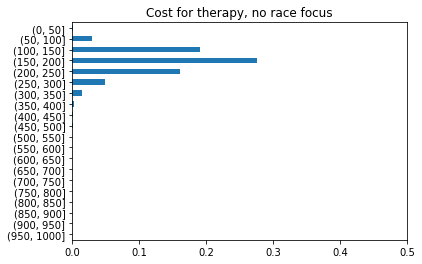

In [87]:
ax = (df2[df2[race_columns].sum(axis=1) == 0].cost_bins.value_counts()/ 5050).\
    sort_index(ascending=False).plot(kind='barh', title='Cost for therapy, no race focus')

ax.set_xlim(0, 0.5)
plt.savefig(f"therapists-cost-no-racefocus-pct.pdf", bbox_inches='tight')

# Therapy cost vs graduation year

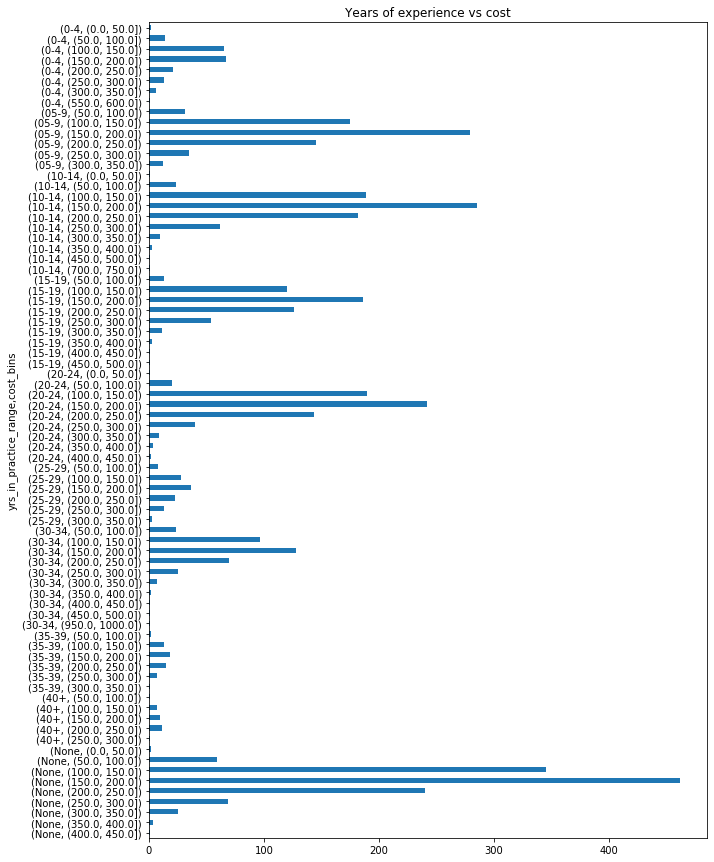

In [100]:
df2.groupby('yrs_in_practice_range').cost_bins.value_counts().sort_index(ascending=False).\
plot(kind='barh', figsize=(10,15), title='Years of experience vs cost')

In [ ]:
# for groupname, group in df2.groupby('grad_yr_bin'):
#     fig, ax = plt.subplots()
#     group.cost_bins.value_counts().sort_index().plot(title=groupname, kind='bar')

#.plot(kind='barh', figsize=(10,15), title='Graduation year of therapist vs cost')

In [102]:
# Turn into PERCENTAGE

binned = df2.groupby(['grad_yr_bin', 'cost_bins'])\
    .size() \
    .groupby(level=0).apply(lambda x: 100 * x/float(x.sum())) \
    .reset_index(name='therapist_pct')

binned['grad_yr_bin'] = binned.grad_yr_bin.astype(str)
binned['cost_bins'] = binned.cost_bins.astype(str)
binned.head(3)

,grad_yr_bin,cost_bins,therapist_pct
0,"(1957, 1962]","(50, 100]",16.666667
1,"(1957, 1962]","(100, 150]",16.666667
2,"(1957, 1962]","(150, 200]",66.666667


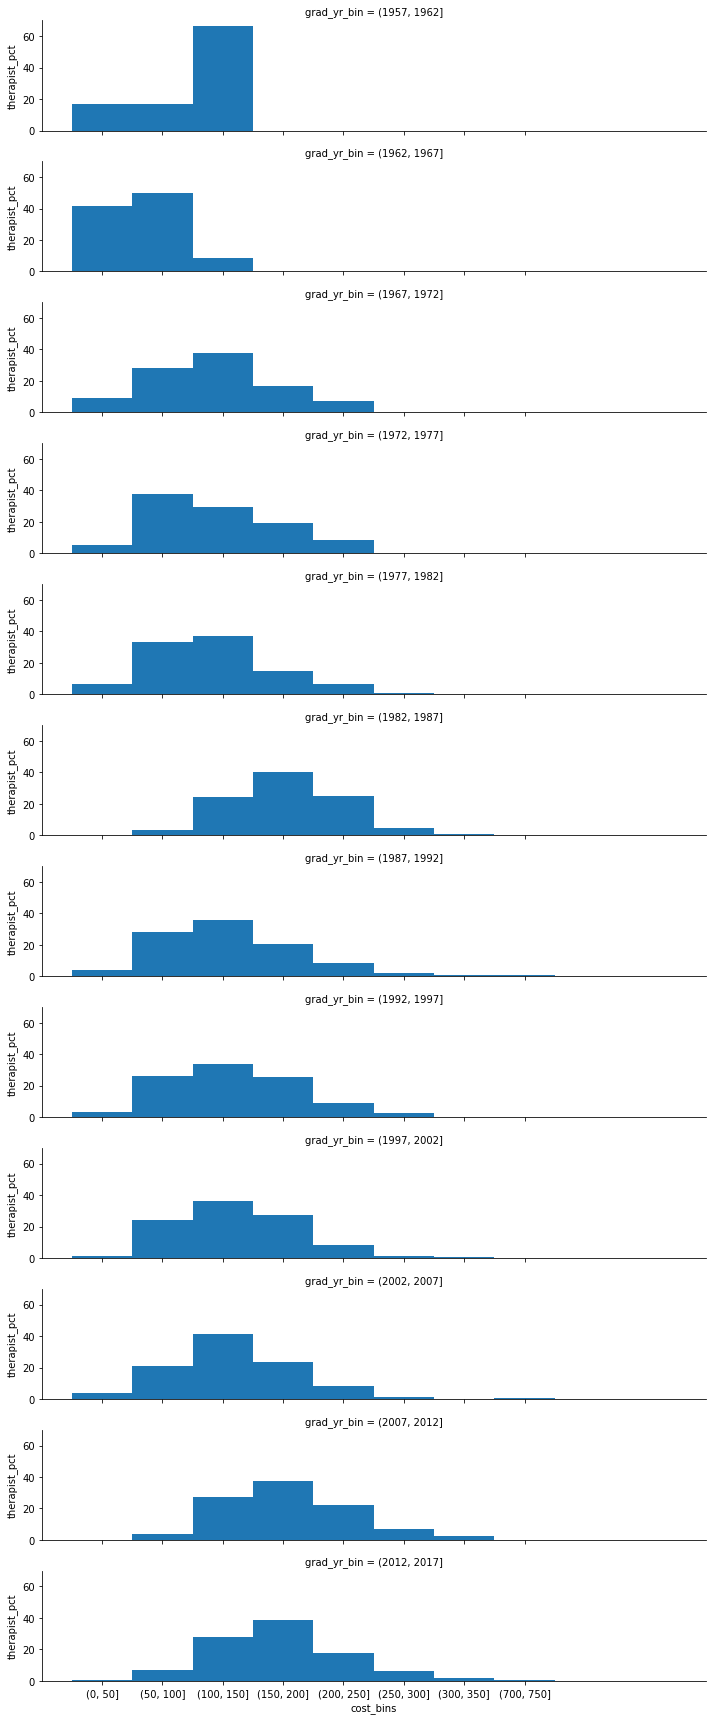

In [110]:
g = sns.FacetGrid(binned, row='grad_yr_bin', height=2, aspect=5)
g.map(plt.bar, 'cost_bins', 'therapist_pct', width=1)

plt.savefig('gradyr-cost-small-multiples.pdf', bbox_inches='tight')

# Years of experience vs cost

In [119]:
binned2 = df2.groupby(['yrs_in_practice_range', 'cost_bins'])\
    .size() \
    .groupby(level=0).apply(lambda x: 100 * x/float(x.sum())) \
    .reset_index(name='therapist_pct')

binned2['yrs_in_practice_range'] = binned2.yrs_in_practice_range.astype(str)
binned2['cost_bins'] = binned2.cost_bins.astype(str)
binned.head(3)

binned2.head()

,yrs_in_practice_range,cost_bins,therapist_pct
0,0-4,"(0, 50]",1.058201
1,0-4,"(50, 100]",7.407407
2,0-4,"(100, 150]",34.391534
3,0-4,"(150, 200]",35.449735
4,0-4,"(200, 250]",11.111111


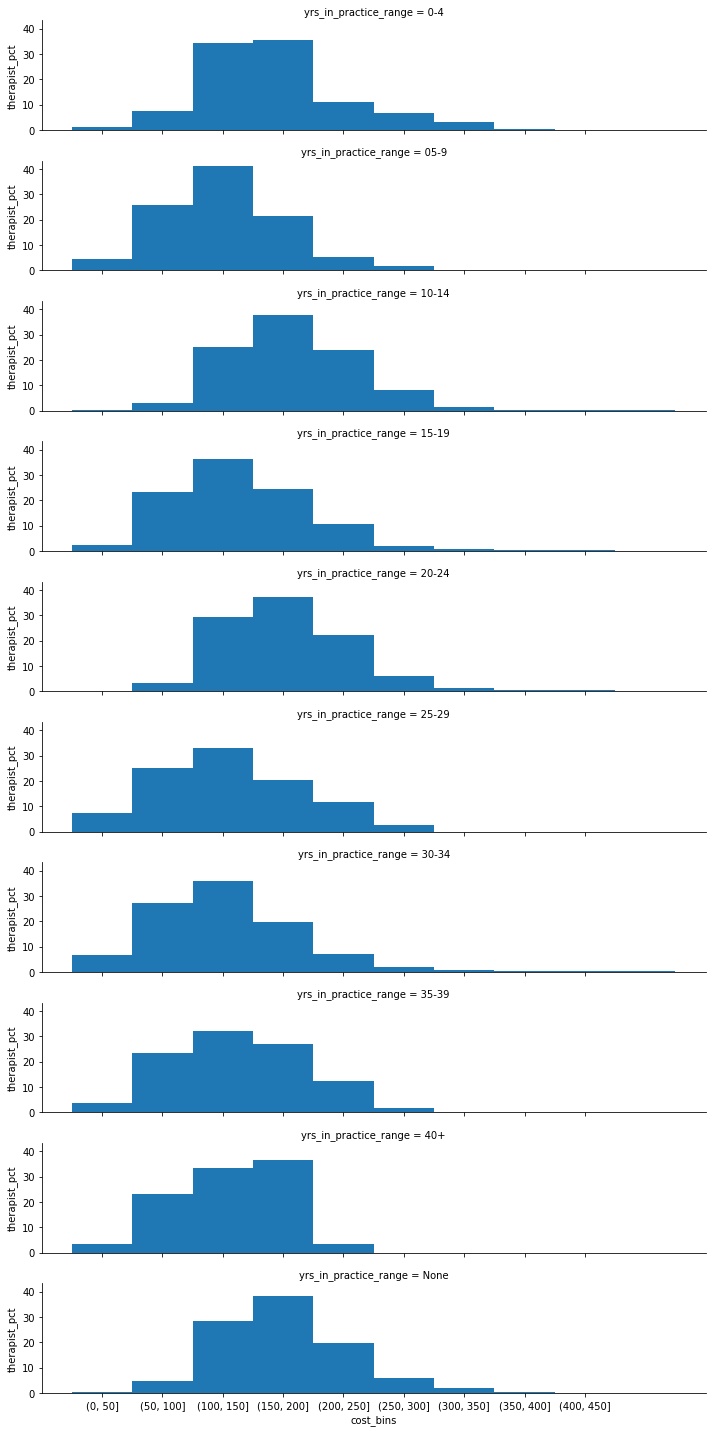

In [121]:
g = sns.FacetGrid(binned2, row='yrs_in_practice_range', height=2, aspect=5)
g.map(plt.bar, 'cost_bins', 'therapist_pct', width=1)

plt.savefig('yrs-experience-cost-small-multiples.pdf', bbox_inches='tight')

# What issues/specialities do therapists practicing CBT focus on?

In [130]:
issue_columns

Index(['issues_family', 'issues_anxiety', 'issues_alcohol', 'issues_drug',
       'issues_career', 'issues_relationship', 'issues_stress',
       'issues_trauma', 'issues_divorce', 'issues_sexabuse',
       'issues_domesticabuse'],
      dtype='object')

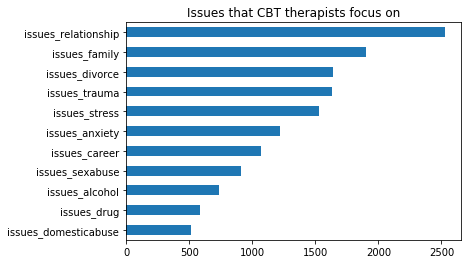

In [135]:
df2[df2['therapytype_cbt'] == 1][issue_columns].sum().\
             sort_index(ascending=False).sort_values().\
             plot(kind='barh', title='Issues that CBT therapists focus on')

# What types of therapy focus on relationship issues?

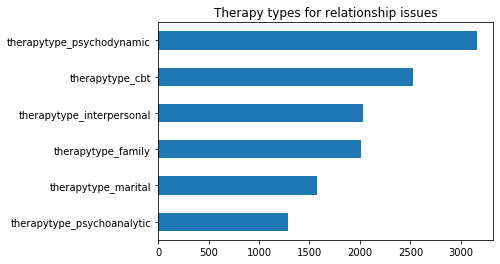

In [146]:
df2[df2['issues_relationship'] == 1][type_columns].sum().\
             sort_index(ascending=False).sort_values().\
             plot(kind='barh', title='Therapy types for relationship issues')

plt.savefig("issue-relationship-therapy-types.pdf",  bbox_inches='tight')

## Psychodynamic is pretty popular across the board

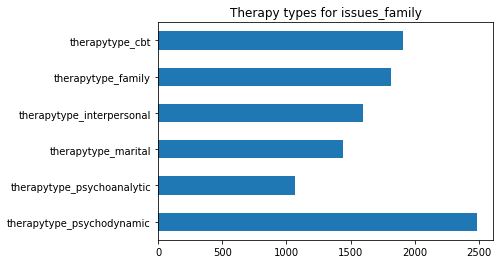

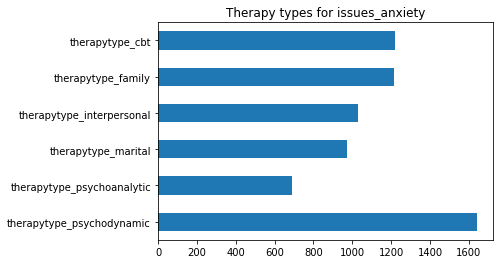

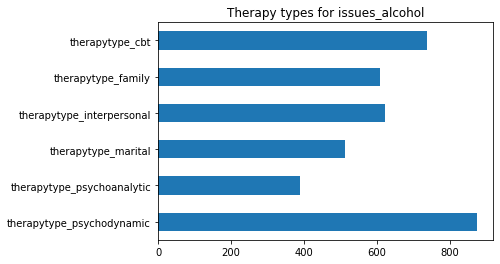

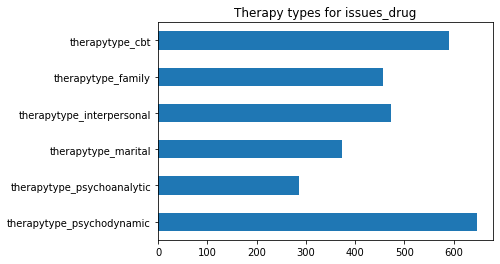

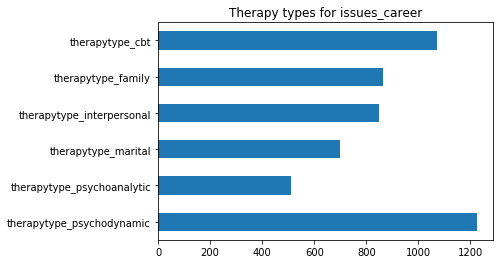

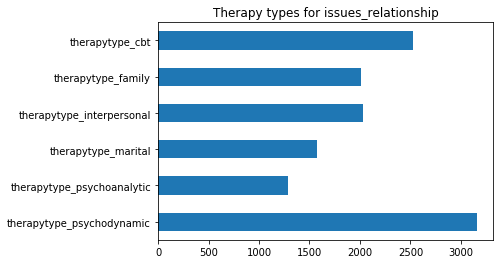

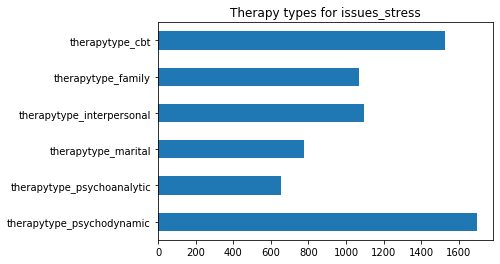

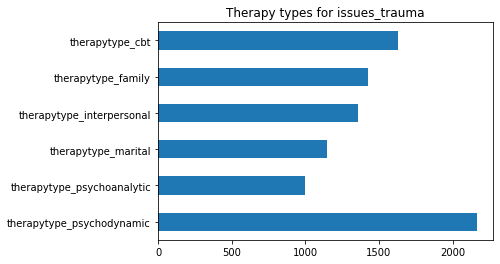

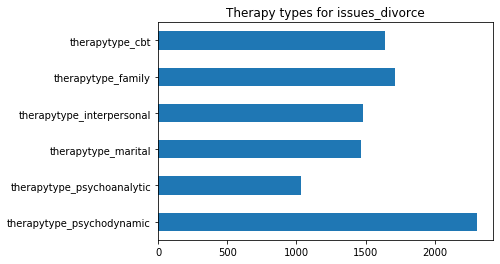

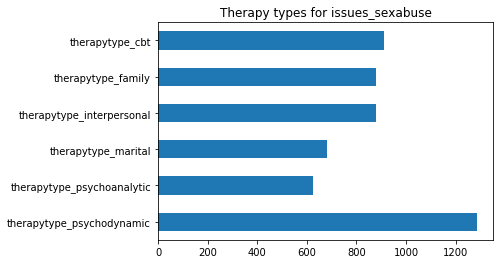

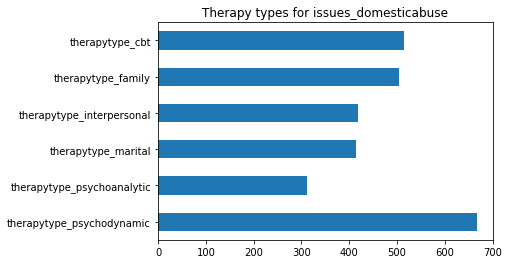

In [141]:
for issue in issue_columns:
    fig, ax = plt.subplots()
    df2[df2[issue] == 1][type_columns].sum().\
             sort_index(ascending=False).\
             plot(kind='barh', title=f'Therapy types for {issue}')

# Do the ten most expensive therapists have anything in common?

In [182]:
title_columns = df2.columns[df2.columns.str.contains("title_")]

In [183]:
df2.sort_values('cost_bins', ascending=False)[title_columns].head(10)

,title_phd,title_LCSW,title_PsyD,title_psychologist,title_LMFT,title_LMHC
4182,1,1,0,0,0,1
4431,1,1,0,0,0,0
6002,0,0,0,0,0,0
1453,0,0,1,1,0,0
5329,0,0,1,1,0,0
1909,0,0,0,0,0,0
5224,1,0,0,1,0,0
4582,0,1,0,0,0,0
1414,1,0,0,0,0,0
5690,0,0,0,0,1,0


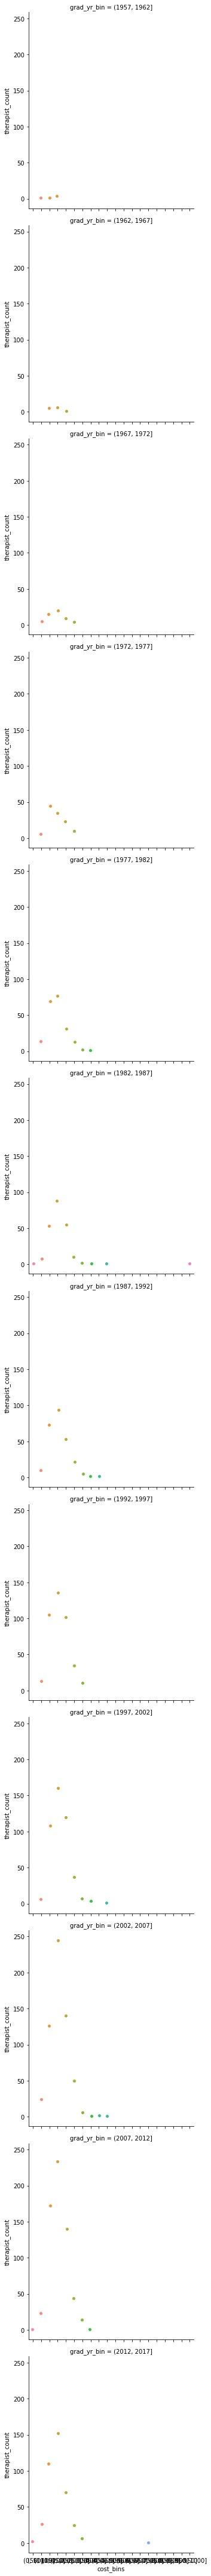

In [91]:
binned = df2.groupby(['grad_yr_bin', 'cost_bins'])\
    .size().reset_index(name='therapist_count')
import seaborn as sns

sns.catplot(data=binned, x='cost_bins', y='therapist_count', row='grad_yr_bin')